# DSCI 303 – Project 04
### Chris Moore

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Part 1: Loading the Dataset; Preliminary Analysis
>In this section, we will load the data into a DataFrame, and will explore the structure of the data set.

In [2]:
diamonds= pd.read_csv('diamonds.txt', delimiter = '\t')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Now we will show the shape of the diamonds data set using diamonds.shape 

In [3]:
print(diamonds.shape)

(53940, 10)


We will now inspect the distribution of the columns in diamonds using the diamonds.describe()

In [48]:
diamonds.describe()

,carat,depth,table,price,x,y,z,ln_carat,ln_price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,-0.394967,7.786768
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.584828,1.014649
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,-1.609438,5.786897
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,-0.916291,6.856462
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,-0.356675,7.783641
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,0.039221,8.580027
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.611436,9.842835


## Part 2: Filtering and Sorting
>In this part, you will be asked to use filtering and sorting techniques to display information for diamonds satisfying certain criteria

In [5]:
(diamonds[['price', 'carat','cut','color','clarity']].sort_values('price',ascending=False)).head(5)

,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1


We will now view information about the 5 least expensive diamonds in the dataset.

In [6]:
(diamonds[['price', 'carat','cut','color','clarity']].sort_values('price',ascending=True)).head(5)

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


We will now view information about the 5 largest diamonds in the dataset with an ideal cut.

In [7]:
(diamonds.loc[diamonds.cut=='Ideal',
              ['price', 'carat','cut','color','clarity']].sort_values('carat',ascending=False)).head(5) 

,price,carat,cut,color,clarity
24329,12587,3.50,Ideal,H,I1
24298,12545,3.22,Ideal,I,I1
26468,16037,3.01,Ideal,J,SI2
26745,16538,3.01,Ideal,J,I1
24785,13156,2.75,Ideal,D,I1


We will now view information about the 5 largest diamonds in the dataset with a fair cut.

In [8]:
(diamonds.loc[diamonds.cut=='Fair',
              ['price', 'carat','cut','color','clarity']].sort_values('carat',ascending=False)).head(5) 

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1


## Part 3: Working with Categorical Variables
> The columns cut, color, and clarity are categorical variables whose values represent discrete categories that the diamonds can be classified into. Any possible value that a categorical variable can take is referred to as a level of that variable. We will be creating lists to specify the order for each of the three categorical variables.

In [9]:
clarity_levels=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
cut_levels=['Fair','Good','Very Good','Premium','Ideal']
color_levels=['J','I','H','G','F','E','D']

We will now use the categorical function of pandas to define the order of the elements in the three lists we just created. 

In [10]:
diamonds.cut = pd.Categorical(diamonds.cut,cut_levels)
diamonds.color = pd.Categorical(diamonds.color,color_levels)
diamonds.clarity = pd.Categorical(diamonds.clarity,clarity_levels)

We will now create lists of named colors to serve as palettes to be used for visualizations later in the notebook.

In [11]:
clarity_pal=['goldenrod','forestgreen','deepskyblue','crimson','rebeccapurple','orange','hotpink','darkblue']
color_pal=['goldenrod','forestgreen','deepskyblue','crimson','rebeccapurple','orange','darkblue']
cut_pal=['goldenrod','forestgreen','deepskyblue','crimson','rebeccapurple']

## Part 4: Displaying Counts for Categorical Variables
>In this part, we will determine the number of diamonds with each level of each of the three categorical variables.
We will start by counting the number of diamonds for each level of cut.

In [12]:
display(diamonds[['cut']].value_counts().sort_index())

cut      
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
dtype: int64

We will now count the number of diamonds for each level of color.

In [13]:
display(diamonds[['color']].value_counts().sort_index())

color
J         2808
I         5422
H         8304
G        11292
F         9542
E         9797
D         6775
dtype: int64

We will now count the number of diamonds for each level of clarity.

In [14]:
display(diamonds[['clarity']].value_counts().sort_index())

clarity
I1           741
SI2         9194
SI1        13065
VS2        12258
VS1         8171
VVS2        5066
VVS1        3655
IF          1790
dtype: int64

## Part 5: Scatterplots of Price Against Carat
>In this part, you will explore the relationship between the price and carat attributes by generating scatter plots.


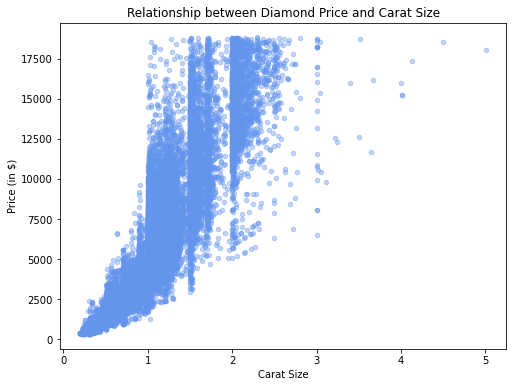

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(diamonds.carat,diamonds.price,s=20,alpha=0.4,c='cornflowerblue')
plt.xlabel("Carat Size")
plt.ylabel("Price (in $)")
plt.title("Relationship between Diamond Price and Carat Size")
plt.show()

We we will reproduce the plot from above, but will now color the points according to
their clarity.

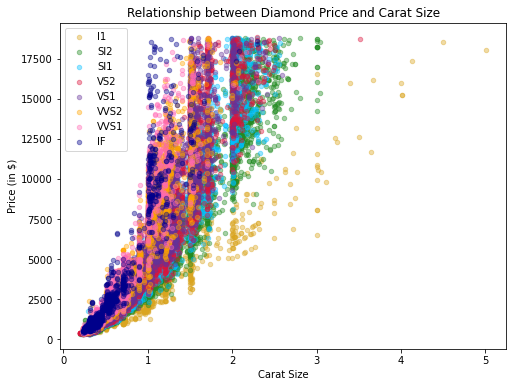

In [66]:

fig,ax = plt.subplots(figsize=(8, 6))

for c, color in zip(clarity_levels, clarity_pal):
    sel = (diamonds.clarity == c)
    ax.scatter(diamonds.carat[sel],diamonds.price[sel], s=20, c=color, alpha=0.4)
    ax.set_label(clarity_levels)
    
    
ax.set_xlabel("Carat Size")
ax.set_ylabel("Price (in $)")
ax.set_title("Relationship between Diamond Price and Carat Size")
plt.legend(clarity_levels)
plt.show()


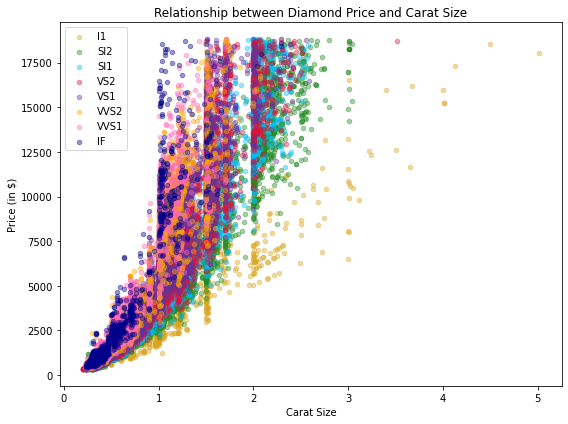

In [65]:
fig,ax = plt.subplots(figsize=(8, 6))
for i, c in enumerate(clarity_levels):  
    sel = (diamonds.clarity == i)
    ax.scatter(diamonds.loc[diamonds.clarity == c,'carat'], 
                diamonds.loc[diamonds.clarity == c,'price'],
                s=20, alpha=0.4,
                color=clarity_pal[i])
    
    ax.set_xlabel("Carat Size")
    ax.set_ylabel("Price (in $)")
    ax.set_title("Relationship between Diamond Price and Carat Size")
    ax.legend(clarity_levels)

plt.tight_layout()
plt.show()

We will now separate the points for each of the eight clarity levels into its own subplot.

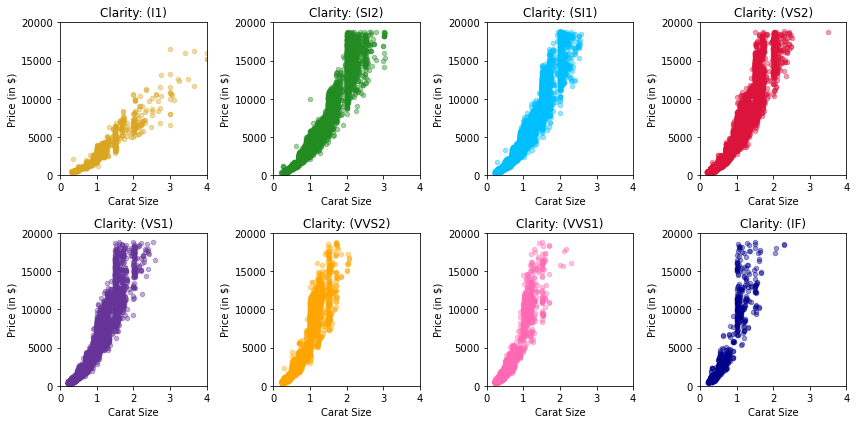

In [38]:
plt.figure(figsize = [12,6])
for i, c in enumerate(clarity_levels):  
    plt.subplot(2,4,i+1)
    plt.scatter(diamonds.loc[diamonds.clarity == c,'carat'], 
                diamonds.loc[diamonds.clarity == c,'price'],
                s=20, alpha=0.4,
                color=clarity_pal[i])
    plt.xlim([0,4])
    plt.ylim([0,20000])
    plt.xlabel('Carat Size')
    plt.ylabel('Price (in $)')
    plt.title('Clarity: (' + (c) + ')')
    

plt.tight_layout()
plt.show()



## Part 6: Applying Logarithmic Transformations
>In this part, you will apply logarithmic transformations to the price and carat columns, and will explore the distribution of these transformed variables.

In [47]:
diamonds['ln_carat'] = np.log(diamonds.loc[:,'carat'])
diamonds['ln_price'] = np.log(diamonds.loc[:,'price'])
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


We will now use histograms to explore the distribution of the diamond prices, and the log of the diamond prices.

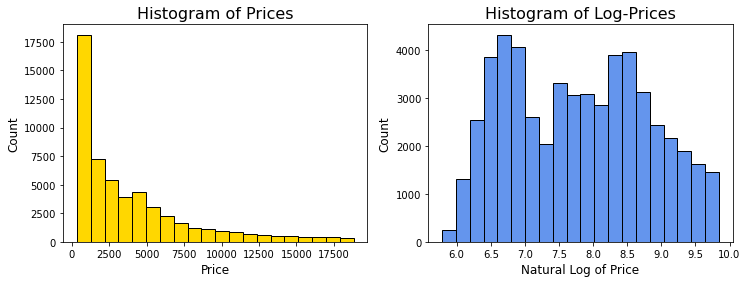

In [50]:

fig, ax = plt.subplots(1,2, figsize = [12,4])
ax[0].hist(diamonds.price, color='gold', edgecolor = 'black',bins=20)
ax[1].hist(diamonds.ln_price, color='cornflowerblue', edgecolor = 'black',bins=20)

ax[0].set_title("Histogram of Prices",fontsize=16)
ax[1].set_title("Histogram of Log-Prices",fontsize=16)
ax[0].set_xlabel("Price",fontsize=12)
ax[1].set_xlabel("Natural Log of Price",fontsize=12)
ax[0].set_ylabel("Count",fontsize=12)
ax[1].set_ylabel("Count",fontsize=12)

plt.show()

We will now use histograms to explore the distribution of the carat sizes, and the
log of the carat sizes.

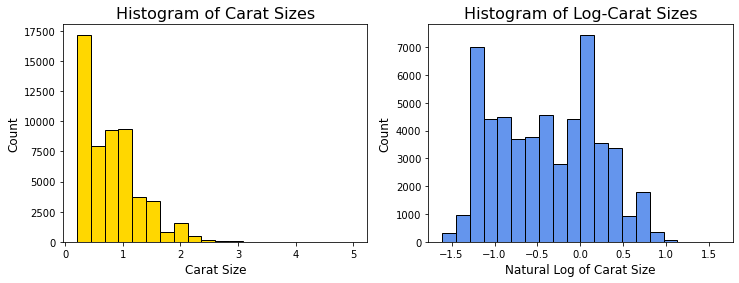

In [51]:
fig, ax = plt.subplots(1,2, figsize = [12,4])
ax[0].hist(diamonds.carat, color='gold', edgecolor = 'black',bins=20)
ax[1].hist(diamonds.ln_carat, color='cornflowerblue', edgecolor = 'black',bins=20)

ax[0].set_title("Histogram of Carat Sizes",fontsize=16)
ax[1].set_title("Histogram of Log-Carat Sizes",fontsize=16)
ax[0].set_xlabel("Carat Size",fontsize=12)
ax[1].set_xlabel("Natural Log of Carat Size",fontsize=12)
ax[0].set_ylabel("Count",fontsize=12)
ax[1].set_ylabel("Count",fontsize=12)

plt.show()

## Part 7: Scatterplot of Transformed Variables
>In this part, you will recreate the second scatterplot from Part 5, but using the transformed variables instead of the original values.

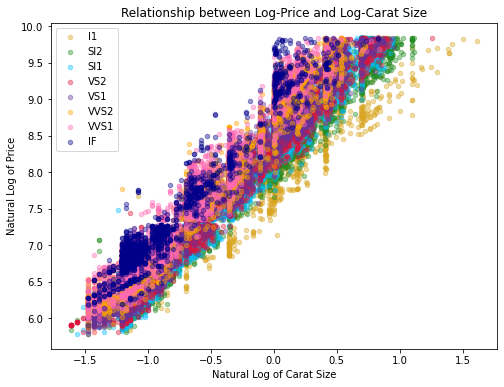

In [52]:
fig,ax = plt.subplots(figsize=(8, 6))

for c, color in zip(clarity_levels, clarity_pal):
    sel = (diamonds.clarity == c)
    ax.scatter(diamonds.ln_carat[sel],diamonds.ln_price[sel], s=20, c=color, alpha=0.4)
    ax.set_label(clarity_levels)
    
    
ax.set_xlabel("Natural Log of Carat Size")
ax.set_ylabel("Natural Log of Price")
ax.set_title("Relationship between Log-Price and Log-Carat Size")
plt.legend(clarity_levels)
plt.show()

## Part 8: Grouping by Cut
>In this part, you will calculate the mean price and carat size for each level of the variable cut.

In [53]:
gb_cut=diamonds[['cut', 'price', 'carat']].groupby(['cut']).mean()
display(gb_cut)

,price,carat
cut,,
Fair,4358.757764,1.046137
Good,3928.864452,0.849185
Very Good,3981.759891,0.806381
Premium,4584.257704,0.891955
Ideal,3457.541970,0.702837


We will now use bar charts to graphically display the information from the DataFrame above.

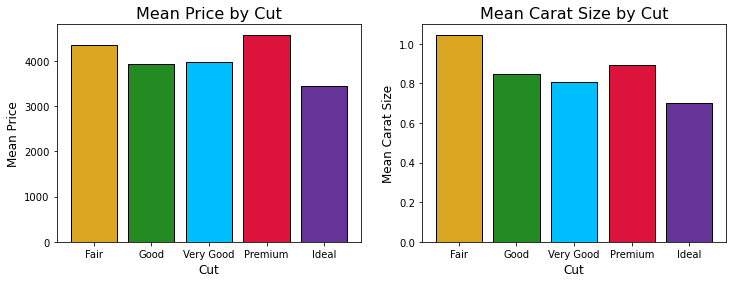

In [59]:

fig, ax = plt.subplots(1,2, figsize = [12,4])
ax[0].bar(gb_cut.index, height = gb_cut["price"], color=cut_pal, edgecolor = 'black')
ax[1].bar(gb_cut.index, height = gb_cut["carat"], color=cut_pal, edgecolor = 'black')

ax[0].set_title("Mean Price by Cut",fontsize=16)
ax[1].set_title("Mean Carat Size by Cut",fontsize=16)
ax[0].set_xlabel("Cut",fontsize=12)
ax[1].set_xlabel("Cut",fontsize=12)
ax[0].set_ylabel("Mean Price",fontsize=12)
ax[1].set_ylabel("Mean Carat Size",fontsize=12)

plt.show()

## Part 9: Grouping by Color
>In this part, you will calculate the mean price and carat size for each level of the variable color.

In [55]:
gb_color=diamonds[['color', 'price', 'carat']].groupby(['color']).mean()
display(gb_color)

,price,carat
color,,
J,5323.818020,1.162137
I,5091.874954,1.026927
H,4486.669196,0.911799
G,3999.135671,0.771190
F,3724.886397,0.736538
E,3076.752475,0.657867
D,3169.954096,0.657795


We will now use bar charts to graphically display the information from the
DataFrame above.

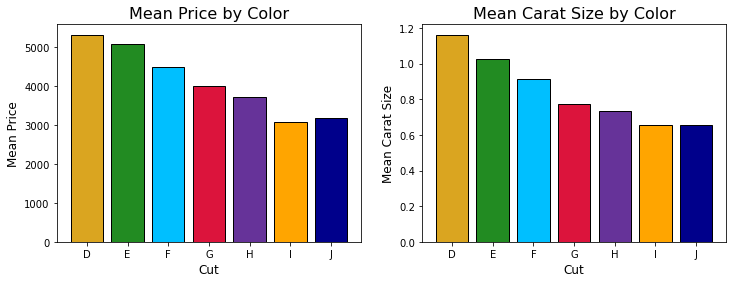

In [56]:
colors = np.unique(diamonds['color'])

fig, ax = plt.subplots(1,2, figsize = [12,4])
ax[0].bar(colors, height = gb_color["price"], color=color_pal, edgecolor = 'black')
ax[1].bar(colors, height = gb_color["carat"], color=color_pal, edgecolor = 'black')

ax[0].set_title("Mean Price by Color",fontsize=16)
ax[1].set_title("Mean Carat Size by Color",fontsize=16)
ax[0].set_xlabel("Cut",fontsize=12)
ax[1].set_xlabel("Cut",fontsize=12)
ax[0].set_ylabel("Mean Price",fontsize=12)
ax[1].set_ylabel("Mean Carat Size",fontsize=12)

plt.show()

## Part 10: Grouping by Clarity
>In this part, you will calculate the mean price and carat size for each level of the variable clarity.

In [57]:
gb_clarity=diamonds[['clarity', 'price', 'carat']].groupby(['clarity']).mean()
display(gb_clarity)

,price,carat
clarity,,
I1,3924.168691,1.283846
SI2,5063.028606,1.077648
SI1,3996.001148,0.850482
VS2,3924.989395,0.763935
VS1,3839.455391,0.727158
VVS2,3283.737071,0.596202
VVS1,2523.114637,0.503321
IF,2864.839106,0.505123


We will now use bar charts to graphically display the information from the DataFrame above.

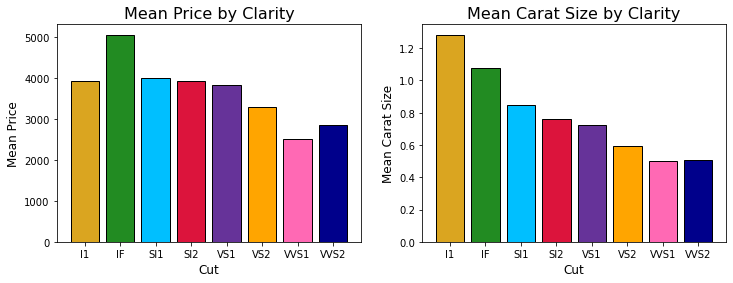

In [58]:
clarity = np.unique(diamonds['clarity'])

fig, ax = plt.subplots(1,2, figsize = [12,4])
ax[0].bar(clarity, height = gb_clarity["price"], color=clarity_pal, edgecolor = 'black')
ax[1].bar(clarity, height = gb_clarity["carat"], color=clarity_pal, edgecolor = 'black')

ax[0].set_title("Mean Price by Clarity",fontsize=16)
ax[1].set_title("Mean Carat Size by Clarity",fontsize=16)
ax[0].set_xlabel("Cut",fontsize=12)
ax[1].set_xlabel("Cut",fontsize=12)
ax[0].set_ylabel("Mean Price",fontsize=12)
ax[1].set_ylabel("Mean Carat Size",fontsize=12)

plt.show()